In [113]:
%pip install pandas statsmodels seaborn matplotlib scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [114]:
# インポート
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [115]:
# JSONLファイルのパス
jsonl_file_path = './data/listings_2024_reviews.json'  # ご自身のファイルパスに置き換えてください

# データをDataFrameに変換
df = pd.read_json(jsonl_file_path, lines=True)


In [116]:
df.head()

,manual_id,listing_name,room_type_id,owner_name,stay_operation_type,prefecture_name,city_name,floor_plan,sqm,number_of_capacity,...,built_year,tag,number_of_s_beds,number_of_sd_beds,number_of_d_beds,number_of_q_beds,number_of_k_beds,number_of_futons,number_of_sofa_beds,overall_rating
0,117-59,Elm高田馬場 230,8da10f98-30bf-4663-b003-c9693ccf6573,MT,住宿,東京都,新宿区,1K,16.50,3,...,1989.0,elm,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.293937
1,117-83,Elm高田馬場 254,8da10f98-30bf-4663-b003-c9693ccf6573,MT,住宿,東京都,新宿区,1K,16.50,3,...,1989.0,elm,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.293937
2,316-20,valore北堀江 203,57670948-3861-495c-b385-1211ff6468e9,MT,特区民泊,大阪府,大阪市西区,1K,28.56,3,...,2022.0,osaka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.750000
3,317-4,大阪ハウス新館 104,02ce66b0-50ae-4ffb-bd5e-2adaa4bab043,MT,特区民泊,大阪府,大阪市浪速区,1DK,42.00,6,...,1969.0,osaka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.571429
4,464-4,LEGEND COURT曳舟 202,e8ced48c-1ae0-48ff-ae4e-cfd9aa79df89,MT,住宿,東京都,墨田区,1DK,27.00,3,...,2023.0,tokyo_east_small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.866667


In [117]:
# 統計情報

df.describe()

,sqm,number_of_capacity,location_floor,built_year,number_of_s_beds,number_of_sd_beds,number_of_d_beds,number_of_q_beds,number_of_k_beds,number_of_futons,number_of_sofa_beds,overall_rating
count,1988.000000,1989.000000,1913.000000,1985.000000,43.000000,85.000000,187.000000,11.000000,12.000000,31.000000,60.000000,1989.000000
mean,28.588521,3.447461,3.816519,2013.372796,1.418605,1.329412,1.064171,0.090909,0.166667,1.419355,0.866667,4.553375
std,12.917270,1.632751,2.230283,15.695215,0.763219,0.891604,0.514468,0.301511,0.389249,0.719916,0.430477,0.342288
min,10.710000,1.000000,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,20.767500,2.000000,2.000000,2006.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.387097
50%,25.675000,3.000000,3.000000,2022.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.611111
75%,31.470000,4.000000,5.000000,2023.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,4.777778
max,155.300000,14.000000,19.000000,2024.000000,4.000000,6.000000,4.000000,1.000000,1.000000,4.000000,2.000000,5.000000


In [118]:
# 欠損値の数
df.isnull().sum()


manual_id                 0
listing_name              0
room_type_id              0
owner_name                0
stay_operation_type       0
prefecture_name           0
city_name                 0
floor_plan                1
sqm                       1
number_of_capacity        0
has_elevator           1687
has_auto_lock          1692
first_line                3
first_station             3
first_walk_min            3
location_floor           76
built_year                4
tag                       0
number_of_s_beds       1946
number_of_sd_beds      1904
number_of_d_beds       1802
number_of_q_beds       1978
number_of_k_beds       1977
number_of_futons       1958
number_of_sofa_beds    1929
overall_rating            0
dtype: int64

In [119]:
# ダミー変数の追加

df = pd.get_dummies(df, columns=[
    'stay_operation_type',
    'prefecture_name',
    'city_name',
    'floor_plan',
    'tag',
    'first_station',
    'first_line',
], drop_first=True)

df.head()

,manual_id,listing_name,room_type_id,owner_name,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,...,first_line_都営大江戸線,first_line_都営大江戸線・東京メトロ副都心線,first_line_都営新宿線,first_line_都営浅草線,first_line_都電荒川線,first_line_阪急神戸線,first_line_阪急電鉄神戸線,first_line_阪神なんば線,first_line_阪神電鉄阪神なんば線,first_line_ＪＲ中央線
0,117-59,Elm高田馬場 230,8da10f98-30bf-4663-b003-c9693ccf6573,MT,16.50,3,有,無,4,2.0,...,False,False,False,False,False,False,False,False,False,False
1,117-83,Elm高田馬場 254,8da10f98-30bf-4663-b003-c9693ccf6573,MT,16.50,3,有,無,4,2.0,...,False,False,False,False,False,False,False,False,False,False
2,316-20,valore北堀江 203,57670948-3861-495c-b385-1211ff6468e9,MT,28.56,3,None,None,1,2.0,...,False,False,False,False,False,False,False,False,False,False
3,317-4,大阪ハウス新館 104,02ce66b0-50ae-4ffb-bd5e-2adaa4bab043,MT,42.00,6,None,None,10,1.0,...,False,False,False,False,False,False,False,False,False,False
4,464-4,LEGEND COURT曳舟 202,e8ced48c-1ae0-48ff-ae4e-cfd9aa79df89,MT,27.00,3,None,None,7,2.0,...,False,False,False,False,False,False,False,False,False,False


In [120]:
# 欠損値の処理

df['number_of_s_beds'].fillna(0, inplace=True)
df['number_of_sd_beds'].fillna(0, inplace=True)
df['number_of_d_beds'].fillna(0, inplace=True)
df['number_of_q_beds'].fillna(0, inplace=True)
df['number_of_k_beds'].fillna(0, inplace=True)
df['number_of_futons'].fillna(0, inplace=True)
df['number_of_sofa_beds'].fillna(0, inplace=True)

df['first_walk_min'] = pd.to_numeric(df['first_walk_min'], errors='coerce')

df['has_elevator'] = df['has_elevator'].map({'有': 1, '無': 0})
df['has_elevator'].fillna(0.5, inplace=True)

df['has_auto_lock'] = df['has_auto_lock'].map({'有': 1, '無': 0})
df['has_auto_lock'].fillna(0.5, inplace=True)

df = df.dropna()

df.isnull().sum()

/var/folders/pd/2jj0t6nx237d_97r8zs2969c0000gn/T/ipykernel_7089/10565926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_of_s_beds'].fillna(0, inplace=True)
/var/folders/pd/2jj0t6nx237d_97r8zs2969c0000gn/T/ipykernel_7089/10565926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

manual_id                0
listing_name             0
room_type_id             0
owner_name               0
sqm                      0
                        ..
first_line_阪急神戸線         0
first_line_阪急電鉄神戸線       0
first_line_阪神なんば線        0
first_line_阪神電鉄阪神なんば線    0
first_line_ＪＲ中央線         0
Length: 308, dtype: int64

In [121]:
# built_yearは築年数に変換

df['built_year'] = 2024 - df['built_year']

In [122]:
# floor_planの変換

# 1Rから始まるものはfloor_plan_group_1Rにまとめる
df['floor_plan_group_1R'] = df[[column for column in df.columns if column.startswith('floor_plan_1R')]].any(axis=1).astype(int)
df.drop([column for column in df.columns if column.startswith('floor_plan_1R')], axis=1, inplace=True)

# floor_plan_1DK+Sとfloor_plan_1DKSはfloor_plan_1SDKにまとめる
df['floor_plan_1SDK'] = df[['floor_plan_1DKS', 'floor_plan_1DK+S', 'floor_plan_1DKS']].any(axis=1).astype(int)
df.drop(['floor_plan_1DK+S', 'floor_plan_1DKS'], axis=1, inplace=True)

# 1Kから始まるものはfloor_plan_group_1Kにまとめる
df['floor_plan_group_1K'] = df[[column for column in df.columns if column.startswith('floor_plan_1K')]].any(axis=1).astype(int)
df.drop([column for column in df.columns if column.startswith('floor_plan_1K')], axis=1, inplace=True)

# floor_plan_２LDKはfloor_plan_2LDKにまとめる
df['floor_plan_2LDK'] = df[['floor_plan_２LDK', 'floor_plan_2LDK']].any(axis=1).astype(int)
df.drop(['floor_plan_２LDK'], axis=1, inplace=True)

# データがないカラムを一部削除
df.drop(["floor_plan_4DK", "floor_plan_4LDK", "floor_plan_戸建"], axis=1, inplace=True)

In [123]:
# 寝具関連の変換

# number_of_sd_bedsは>0かどうかでbooleanに変換
df['has_sd_bed'] = (df['number_of_sd_beds'] > 0).astype(int)
df.drop('number_of_sd_beds', axis=1, inplace=True)

df['has_d_bed'] = (df['number_of_d_beds'] > 0).astype(int)
df.drop('number_of_d_beds', axis=1, inplace=True)

df['has_q_bed'] = (df['number_of_q_beds'] > 0).astype(int)
df.drop('number_of_q_beds', axis=1, inplace=True)

df['has_k_bed'] = (df['number_of_k_beds'] > 0).astype(int)
df.drop('number_of_k_beds', axis=1, inplace=True)

df['has_futon'] = (df['number_of_futons'] > 0).astype(int)
df.drop('number_of_futons', axis=1, inplace=True)

df['has_sofa_bed'] = (df['number_of_sofa_beds'] > 0).astype(int)
df.drop('number_of_sofa_beds', axis=1, inplace=True)

In [124]:
# city_nameを変換

# city_nameで始まるもののうち、city_name_大阪市から始まるものはまとめる: いずれかのcity_nameの部分がtrueならば、city_name_大阪市もtrue
df['city_name_大阪市'] = df[[col for col in df.columns if col.startswith('city_name_大阪市')]].any(axis=1)
df.drop([col for col in df.columns if col.startswith('city_name_大阪市') and col != 'city_name_大阪市'], axis=1, inplace=True)

df = df[df['prefecture_name_東京都'] == 1]

array([[<Axes: xlabel='sqm', ylabel='sqm'>,
        <Axes: xlabel='number_of_capacity', ylabel='sqm'>,
        <Axes: xlabel='has_elevator', ylabel='sqm'>,
        <Axes: xlabel='has_auto_lock', ylabel='sqm'>,
        <Axes: xlabel='first_walk_min', ylabel='sqm'>,
        <Axes: xlabel='built_year', ylabel='sqm'>,
        <Axes: xlabel='overall_rating', ylabel='sqm'>],
       [<Axes: xlabel='sqm', ylabel='number_of_capacity'>,
        <Axes: xlabel='number_of_capacity', ylabel='number_of_capacity'>,
        <Axes: xlabel='has_elevator', ylabel='number_of_capacity'>,
        <Axes: xlabel='has_auto_lock', ylabel='number_of_capacity'>,
        <Axes: xlabel='first_walk_min', ylabel='number_of_capacity'>,
        <Axes: xlabel='built_year', ylabel='number_of_capacity'>,
        <Axes: xlabel='overall_rating', ylabel='number_of_capacity'>],
       [<Axes: xlabel='sqm', ylabel='has_elevator'>,
        <Axes: xlabel='number_of_capacity', ylabel='has_elevator'>,
        <Axes: xlabel='has_ele

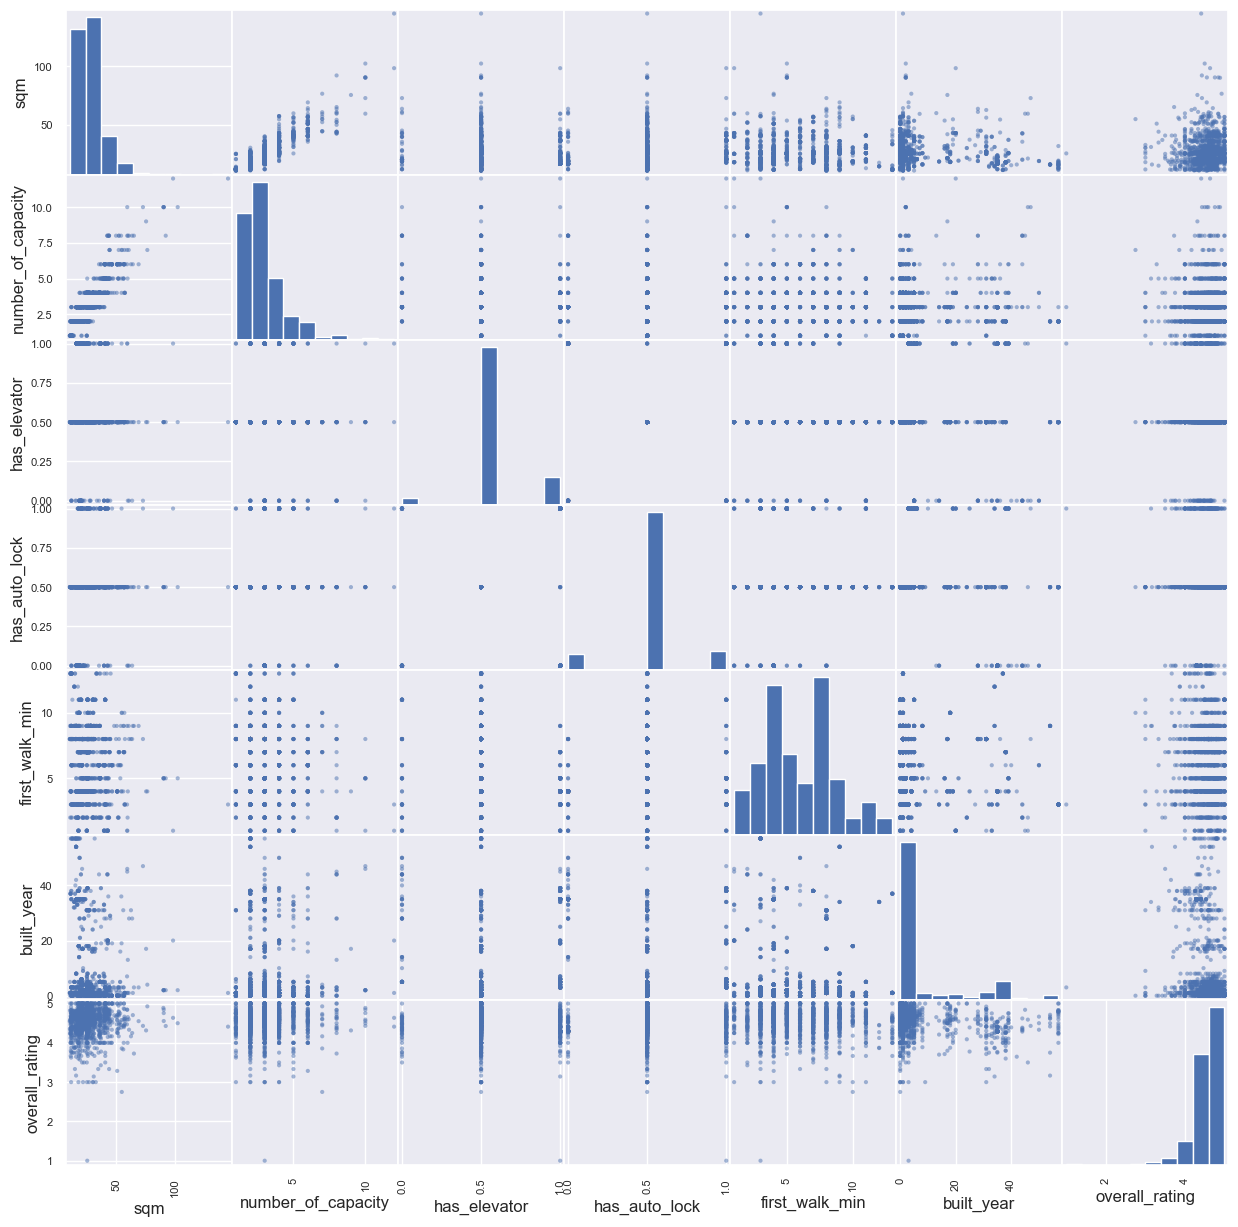

In [125]:
from pandas import plotting

plotting.scatter_matrix(
    df[[
        "sqm",
        "number_of_capacity",
        "has_elevator",
        "has_auto_lock",
        "first_walk_min",
        "built_year",
        "overall_rating",
    ]],
    figsize=(15, 15),
)

<Axes: >

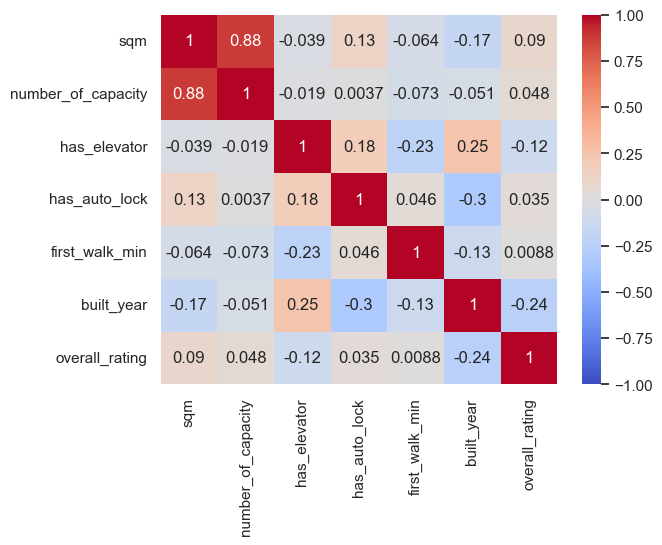

In [126]:
sns.heatmap(
    df[[
        "sqm",
        "number_of_capacity",
        "has_elevator",
        "has_auto_lock",
        "first_walk_min",
        "built_year",
        "overall_rating",
    ]].corr(),
    vmin=-1, annot=True, cmap='coolwarm')

In [127]:
df.head()

,manual_id,listing_name,room_type_id,owner_name,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,...,first_line_ＪＲ中央線,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed,city_name_大阪市
0,117-59,Elm高田馬場 230,8da10f98-30bf-4663-b003-c9693ccf6573,MT,16.50,3,1.0,0.0,4.0,2.0,...,False,0,1,0,0,0,0,0,0,False
1,117-83,Elm高田馬場 254,8da10f98-30bf-4663-b003-c9693ccf6573,MT,16.50,3,1.0,0.0,4.0,2.0,...,False,0,1,1,0,0,0,0,0,False
4,464-4,LEGEND COURT曳舟 202,e8ced48c-1ae0-48ff-ae4e-cfd9aa79df89,MT,27.00,3,0.5,0.5,7.0,2.0,...,False,0,0,0,0,0,0,0,0,False
5,406-6,LaVie四谷 204,a8611c93-637e-47ba-bbda-e332b0e8bdea,MT,17.94,2,0.5,0.5,8.0,2.0,...,False,0,0,0,0,0,0,0,0,False
6,354-14,プレールドゥーク大森町II 207,b212929a-c4d9-4a49-9102-13d1e3f65355,MT,25.41,3,0.5,0.5,5.0,2.0,...,False,0,1,0,0,0,0,0,0,False


In [128]:
# 統計情報

df.describe()

,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,built_year,number_of_s_beds,overall_rating,floor_plan_1SDK,floor_plan_2LDK,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,27.025452,3.172065,0.554993,0.507422,5.942645,3.594467,8.543185,0.032389,4.544672,0.004049,0.039811,0.269906,0.374494,0.045884,0.104588,0.000675,0.000675,0.016869,0.028340
std,11.721490,1.410179,0.204223,0.209366,2.705950,2.113472,13.929642,0.238787,0.341048,0.063521,0.195581,0.444060,0.484155,0.209304,0.306126,0.025976,0.025976,0.128824,0.165999
min,10.710000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.440000,2.000000,0.500000,0.500000,4.000000,2.000000,1.000000,0.000000,4.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.410000,3.000000,0.500000,0.500000,5.000000,3.000000,2.000000,0.000000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.690000,4.000000,0.500000,0.500000,8.000000,5.000000,5.000000,0.000000,4.777778,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,145.190000,12.000000,1.000000,1.000000,13.000000,19.000000,57.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
# 説明変数の定義
features = [
    'sqm',
    # 'number_of_capacity',
    # 'has_auto_lock',
    'first_walk_min',
]

features += [col for col in df.columns if col.startswith('stay_operation_type_')]

features += [col for col in df.columns if col.startswith('city_name_')]

features += [col for col in df.columns if col.startswith('floor_plan_')]

X = df[features].astype(float)

features

['sqm',
 'first_walk_min',
 'stay_operation_type_旅館業',
 'stay_operation_type_特区民泊',
 'city_name_世田谷区',
 'city_name_中野区',
 'city_name_九十九里町',
 'city_name_京都市右京区',
 'city_name_伊東市',
 'city_name_北区',
 'city_name_南房総市',
 'city_name_台東区',
 'city_name_品川区',
 'city_name_墨田区',
 'city_name_大田区',
 'city_name_山中湖村',
 'city_name_文京区',
 'city_name_新宿区',
 'city_name_杉並区',
 'city_name_板橋区',
 'city_name_江戸川区',
 'city_name_渋谷区',
 'city_name_港区',
 'city_name_葛飾区',
 'city_name_豊島区',
 'city_name_那須塩原市',
 'city_name_那須町',
 'city_name_大阪市',
 'floor_plan_1LDK',
 'floor_plan_1LDL',
 'floor_plan_1SDK',
 'floor_plan_1SK',
 'floor_plan_1SLDK',
 'floor_plan_2DK',
 'floor_plan_2K',
 'floor_plan_2LDK',
 'floor_plan_3DK',
 'floor_plan_3LDK',
 'floor_plan_１LDK',
 'floor_plan_group_1R',
 'floor_plan_group_1K']

In [130]:
# 相関係数を確認
cor = df[features].corr()

cor


,sqm,first_walk_min,stay_operation_type_旅館業,stay_operation_type_特区民泊,city_name_世田谷区,city_name_中野区,city_name_九十九里町,city_name_京都市右京区,city_name_伊東市,city_name_北区,...,floor_plan_1SK,floor_plan_1SLDK,floor_plan_2DK,floor_plan_2K,floor_plan_2LDK,floor_plan_3DK,floor_plan_3LDK,floor_plan_１LDK,floor_plan_group_1R,floor_plan_group_1K
sqm,1.000000,-0.064389,0.153903,-0.020200,0.014653,-0.015346,NaN,NaN,NaN,-0.019234,...,0.028396,0.182715,0.139087,0.014617,0.509396,NaN,0.234809,0.052155,-0.426700,-0.254866
first_walk_min,-0.064389,1.000000,-0.080521,-0.041747,0.068087,-0.114316,NaN,NaN,NaN,0.014284,...,-0.048994,0.010719,-0.135925,0.090274,-0.032682,NaN,-0.003068,-0.012810,0.181471,-0.244899
stay_operation_type_旅館業,0.153903,-0.080521,1.000000,-0.017653,-0.020076,-0.011438,NaN,NaN,NaN,-0.008611,...,-0.003712,-0.004288,0.300728,-0.007754,0.109687,NaN,0.279486,-0.003030,-0.031547,-0.063775
stay_operation_type_特区民泊,-0.020200,-0.041747,-0.017653,1.000000,-0.052168,-0.029721,NaN,NaN,NaN,-0.022375,...,-0.009646,-0.011142,-0.023072,-0.020148,-0.043611,NaN,-0.012461,-0.007873,-0.107955,0.242759
city_name_世田谷区,0.014653,0.068087,-0.020076,-0.052168,1.000000,-0.033801,NaN,NaN,NaN,-0.025446,...,0.119613,-0.012671,-0.026238,0.008558,-0.034587,NaN,-0.014172,0.150922,0.195667,-0.115707
city_name_中野区,-0.015346,-0.114316,-0.011438,-0.029721,-0.033801,1.000000,NaN,NaN,NaN,-0.014497,...,-0.006250,-0.007219,-0.014949,-0.013054,-0.028257,NaN,-0.008074,-0.005101,-0.039716,0.025745
city_name_九十九里町,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name_京都市右京区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name_伊東市,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name_北区,-0.019234,0.014284,-0.008611,-0.022375,-0.025446,-0.014497,NaN,NaN,NaN,1.000000,...,-0.004705,-0.005435,0.111379,-0.009828,-0.021272,NaN,-0.006078,-0.003840,-0.063520,-0.053854


In [131]:
df.describe()

,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,built_year,number_of_s_beds,overall_rating,floor_plan_1SDK,floor_plan_2LDK,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,27.025452,3.172065,0.554993,0.507422,5.942645,3.594467,8.543185,0.032389,4.544672,0.004049,0.039811,0.269906,0.374494,0.045884,0.104588,0.000675,0.000675,0.016869,0.028340
std,11.721490,1.410179,0.204223,0.209366,2.705950,2.113472,13.929642,0.238787,0.341048,0.063521,0.195581,0.444060,0.484155,0.209304,0.306126,0.025976,0.025976,0.128824,0.165999
min,10.710000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.440000,2.000000,0.500000,0.500000,4.000000,2.000000,1.000000,0.000000,4.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.410000,3.000000,0.500000,0.500000,5.000000,3.000000,2.000000,0.000000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.690000,4.000000,0.500000,0.500000,8.000000,5.000000,5.000000,0.000000,4.777778,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,145.190000,12.000000,1.000000,1.000000,13.000000,19.000000,57.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
# VIFの計算

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIFの計算
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values('VIF', ascending=False)


/Users/ishibashi_y/workspace/rm-analyze-listingsales/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,sqm,20.390142
13,city_name_墨田区,9.335740
1,first_walk_min,8.368412
17,city_name_新宿区,7.466874
14,city_name_大田区,5.060926
21,city_name_渋谷区,4.616992
40,floor_plan_group_1K,4.387581
39,floor_plan_group_1R,4.115040
24,city_name_豊島区,3.334408
4,city_name_世田谷区,3.285432


In [133]:
high_vif = vif_data[vif_data['VIF'] > 7]['feature']

X = X.drop(columns=high_vif)


print("VIFが7を超える変数:")
high_vif

VIFが7を超える変数:


0                sqm
1     first_walk_min
13     city_name_墨田区
17     city_name_新宿区
Name: feature, dtype: object

In [134]:
# 特徴量とターゲットの選択
target = 'overall_rating'

X = X.astype(float)

y = df[target]

X = add_constant(X)

# 線形回帰モデルの構築
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     3.181
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           5.38e-08
Time:                        21:27:12   Log-Likelihood:                -464.05
No. Observations:                1482   AIC:                             986.1
Df Residuals:                    1453   BIC:                             1140.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.6153      0.026    174.752      0.000       4.563       4.667
stay_operation_type_旅館業     -0.1294      0.126     -1.026      0.305      -0.377       0.118
stay_operation_type_特区民泊     0.0861      0.055      1.570      0.117      -0.021       0.194
city_name_世田谷区              -0.0299      0.040     -0.740      0.459      -0.109       0.049
city_name_中野区                0.0388      0.064      0.603      0.547      -0.088       0.165
city_name_九十九里町          -2.781e-15   2.06e-15     -1.351      0.177   -6.82e-15    1.26e-15
city_name_京都市右京区         -3.186e-17   9.14e-17     -0.349      0.727   -2.11e-16    1.47e-16
city_name_伊東市             6.797e-16   4.54e-16      1.496      0.135   -2.12e-16    1.57e-15
city_name_北区                -0.1050      0.086     -1.226      0.220      -0.273       0.063
city_name_南房総市           -1.749e-15   1.39e-15     -1.257      0.209   -4.48e-15     9.8e-16
city_name_台東区               -0.1696      0.083     -2.047      0.041      -0.332      -0.007
city_name_品川区                0.0096      0.091      0.106      0.916      -0.169       0.189
city_name_大田区                0.0830      0.037      2.230      0.026       0.010       0.156
city_name_山中湖村            2.575e-16   2.23e-16      1.156      0.248   -1.79e-16    6.94e-16
city_name_文京区                0.1447      0.061      2.388      0.017       0.026       0.264
city_name_杉並区               -0.1093      0.073     -1.503      0.133      -0.252       0.033
city_name_板橋区                0.0706      0.137      0.514      0.607      -0.199       0.340
city_name_江戸川区              -0.0725      0.335     -0.216      0.829      -0.729       0.584
city_name_渋谷区               -0.0827      0.030     -2.715      0.007      -0.142      -0.023
city_name_港区                -0.0131      0.044     -0.295      0.768      -0.100       0.074
city_name_葛飾区               -0.0581      0.379     -0.153      0.878      -0.802       0.686
city_name_豊島区               -0.0623      0.034     -1.837      0.066      -0.129       0.004
city_name_那須塩原市          -3.948e-17   1.55e-16     -0.255      0.799   -3.43e-16    2.64e-16
city_name_那須町            -2.155e-17   2.15e-16     -0.100      0.920   -4.42e-16    3.99e-16
city_name_大阪市            -3.138e-18    1.4e-16     -0.022      0.982   -2.79e-16    2.72e-16
floor_plan_1LDK             -0.0293      0.034     -0.862      0.389      -0.096       0.037
floor_plan_1LDL              0.3847      0.335      1.147      0.251      -0.273       1.042
floor_plan_1SDK              0.1592      0.139      1.146      0.252      -0.113       0.432
floor_plan_1SK              -0.1341      0.197     -0.682      0.496      -0.520       0.252
floor_plan_1SLDK             0.1381      0.173      0.796      0.426      -0.202       0.478
floor_plan_2DK

In [135]:
# Ridge回帰のR^2を計算

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=1.0)
scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')
print("Ridge回帰の平均R²:", scores.mean())

Ridge回帰の平均R²: 0.02491934640792588
